In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
call_data = pd.read_csv('./call_data_from_CAD.csv')
call_data.head()

,Unnamed: 0,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition
0,1,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED
1,2,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED
2,3,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED
3,4,OR-2016-01-01-16000003,1/1/16 0:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,TRAFFIC STOP,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED
4,5,OR-2016-01-01-16000004,1/1/16 0:02,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,CHECK WELFARE,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED


In [5]:
call_data = call_data.drop('Unnamed: 0', axis=1)
call_data.head()

,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition
0,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED
1,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED
2,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED
3,OR-2016-01-01-16000003,1/1/16 0:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,TRAFFIC STOP,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED
4,OR-2016-01-01-16000004,1/1/16 0:02,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,CHECK WELFARE,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED


In [7]:
call_data['Call_Created_Time'] = pd.to_datetime(
    call_data['Call_Created_Time'],
    format='%m/%d/%y %H:%M',
    errors='coerce'
)
call_data.head()

,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition
0,OR-2016-01-01-16000001,2016-01-01 00:00:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED
1,OR-2016-01-01-16000001,2016-01-01 00:00:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED
2,OR-2016-01-01-16000001,2016-01-01 00:00:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED
3,OR-2016-01-01-16000003,2016-01-01 00:00:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,TRAFFIC STOP,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED
4,OR-2016-01-01-16000004,2016-01-01 00:02:00,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,CHECK WELFARE,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED


In [9]:
exclude_exact = {
    'TRANSPORT',
    'MENTAL TRANSPORT',
    'DISORDERLY MEDICAL TRANSPORT',
    'SHELTER TRANSPORT',
    'BASIC NEEDS'
}

exclude_keywords = ['transport', 'pickup', 'basic needs', 'shelter']
pattern = '|'.join(exclude_keywords)
call_signs = r"1J77\s*|3J79\s*|3J78\s*|3J77\s*|4J79\s*|3J81\s*|3J76\s*|2J28\s*|2J29\s*|CAHOOT\s*|CAHOT\s*|CAHO\s*"

In [11]:
call_data_td = call_data[[
    'IncidentNumber', 
    'Call_Created_Time', 
    'PrimaryUnitCallSign', 
    'RespondingUnitCallSign', 
    'InitialIncidentTypeDescription'
]].copy()

call_data_td['Call_Created_Time'] = pd.to_datetime(call_data_td['Call_Created_Time'], errors='coerce')
call_data_td = call_data_td.dropna(subset=['Call_Created_Time'])

call_data_td['PrimaryUnitCallSign'] = call_data_td['PrimaryUnitCallSign'].str.strip().str.upper()
call_data_td['RespondingUnitCallSign'] = call_data_td['RespondingUnitCallSign'].str.strip().str.upper()
call_data_td['InitialIncidentTypeDescription'] = call_data_td['InitialIncidentTypeDescription'].str.strip().str.lower()

call_data_td = call_data_td.dropna(subset=[
    'PrimaryUnitCallSign', 'RespondingUnitCallSign', 'InitialIncidentTypeDescription'
])

In [12]:
exc_partial = call_data_td[call_data_td['InitialIncidentTypeDescription'].str.contains(pattern, na=False)]
exc_exact = call_data_td[call_data_td['InitialIncidentTypeDescription'].isin([e.lower() for e in exclude_exact])]
exc_comb = pd.concat([exc_partial, exc_exact]).drop_duplicates()

call_data_td = call_data_td.drop(exc_comb.index)

call_data_td['date'] = call_data_td['Call_Created_Time'].dt.date
call_data_td['month'] = call_data_td['Call_Created_Time'].dt.to_period('M')
call_data_td.head()

,IncidentNumber,Call_Created_Time,PrimaryUnitCallSign,RespondingUnitCallSign,InitialIncidentTypeDescription,date,month
0,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,5E57,assault,2016-01-01,2016-01
1,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4X40,assault,2016-01-01,2016-01
2,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4E53,assault,2016-01-01,2016-01
3,OR-2016-01-01-16000003,2016-01-01 00:00:00,5T81,5T81,traffic stop,2016-01-01,2016-01
4,OR-2016-01-01-16000004,2016-01-01 00:02:00,3X90,3F61,check welfare,2016-01-01,2016-01


In [15]:
call_data_td['PrimaryIsCAH'] = call_data_td['PrimaryUnitCallSign'].str.contains(call_signs, regex=True, na=False)
call_data_td['RespondingIsCAH'] = call_data_td['RespondingUnitCallSign'].str.contains(call_signs, regex=True, na=False)

call_data_td['Is_Diverted'] = (~call_data_td['PrimaryIsCAH']) & (call_data_td['RespondingIsCAH'])
call_data_td.head()

,IncidentNumber,Call_Created_Time,PrimaryUnitCallSign,RespondingUnitCallSign,InitialIncidentTypeDescription,date,month,PrimaryIsCAH,RespondingIsCAH,Is_Diverted
0,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,5E57,assault,2016-01-01,2016-01,False,False,False
1,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4X40,assault,2016-01-01,2016-01,False,False,False
2,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4E53,assault,2016-01-01,2016-01,False,False,False
3,OR-2016-01-01-16000003,2016-01-01 00:00:00,5T81,5T81,traffic stop,2016-01-01,2016-01,False,False,False
4,OR-2016-01-01-16000004,2016-01-01 00:02:00,3X90,3F61,check welfare,2016-01-01,2016-01,False,False,False


In [17]:
print(f"Excluded (partial): {len(exc_partial)}")
print(f"Excluded (exact): {len(exc_exact)}")
print(f"Total excluded: {len(exc_comb)}")
call_data_td['Is_Diverted'].value_counts()

Excluded (partial): 14078
Excluded (exact): 14078
Total excluded: 13960


Is_Diverted
False    823446
True       8602
Name: count, dtype: int64

In [19]:
call_data_td = call_data_td[
    call_data_td['Call_Created_Time'] < '2022-05-01'
]
call_data_td.head()

,IncidentNumber,Call_Created_Time,PrimaryUnitCallSign,RespondingUnitCallSign,InitialIncidentTypeDescription,date,month,PrimaryIsCAH,RespondingIsCAH,Is_Diverted
0,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,5E57,assault,2016-01-01,2016-01,False,False,False
1,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4X40,assault,2016-01-01,2016-01,False,False,False
2,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4E53,assault,2016-01-01,2016-01,False,False,False
3,OR-2016-01-01-16000003,2016-01-01 00:00:00,5T81,5T81,traffic stop,2016-01-01,2016-01,False,False,False
4,OR-2016-01-01-16000004,2016-01-01 00:02:00,3X90,3F61,check welfare,2016-01-01,2016-01,False,False,False


In [21]:
call_data_td['Call_Created_Time'].min(), call_data_td['Call_Created_Time'].max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2022-04-30 23:58:00'))

In [23]:
overall_diverted_proportion = call_data_td['Is_Diverted'].mean()
print(f"Overall Diversion Rate: {overall_diverted_proportion:.2%}")

Overall Diversion Rate: 1.23%


In [25]:
monthly = (
    call_data_td.groupby('month')['Is_Diverted']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'Diverted', 'count': 'Total'})
)

monthly['Proportion_Diverted'] = monthly['Diverted'] / monthly['Total']
monthly.reset_index(inplace=True)
monthly

,month,Diverted,Total,Proportion_Diverted
0,2016-01,142,13242,0.010723
1,2016-02,137,13415,0.010212
2,2016-03,155,12999,0.011924
3,2016-04,169,12981,0.013019
4,2016-05,210,13219,0.015886
5,2016-06,175,13580,0.012887
6,2016-07,166,14885,0.011152
7,2016-08,117,10249,0.011416
8,2017-01,172,12786,0.013452
9,2017-02,161,12077,0.013331


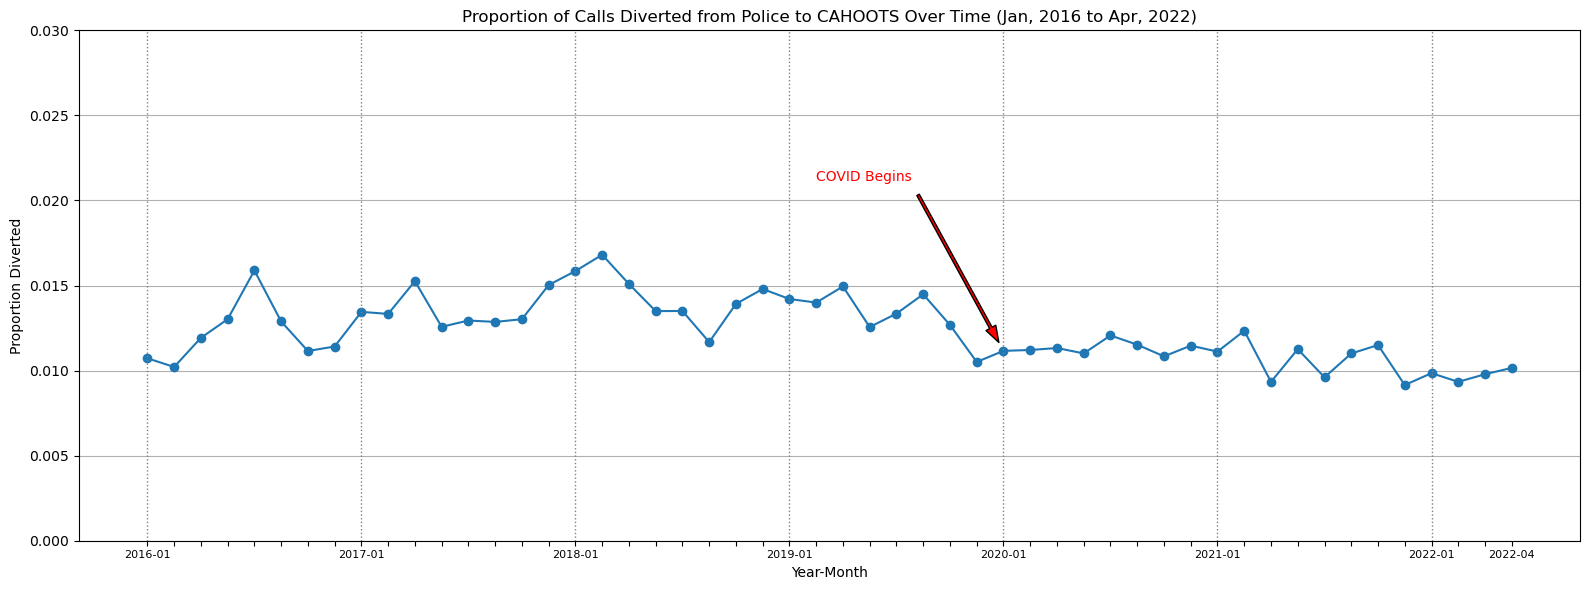

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(monthly['month'].astype(str), monthly['Proportion_Diverted'], marker='o')


# Find all January months and add April 2022 manually
jan_labels = monthly[monthly['month'].dt.month == 1]['month'].astype(str).tolist()
if '2022-04' in monthly['month'].astype(str).values:
    jan_labels.append('2022-04')

# Set xticks to every month, but only label Jan + final April
all_months = monthly['month'].astype(str).tolist()
tick_locs = list(range(len(all_months)))
tick_labels = [label if label in jan_labels else '' for label in all_months]

covid_month = '2020-01'
if covid_month in all_months:
    covid_index = all_months.index(covid_month)
    covid_value = monthly.loc[monthly['month'].astype(str) == covid_month, 'Proportion_Diverted'].values[0]
    
    plt.annotate(
        'COVID Begins',
        xy=(covid_index, covid_value),
        xytext=(covid_index - 7, covid_value + 0.01),
        arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
        fontsize=10,
        color='red'
    )
# covid_index = monthly['month'].astype(str).tolist().index('2020-01')
# plt.axvline(x=covid_index, color='gray', linestyle='dotted', linewidth=1)
jan_indexes = [i for i, m in enumerate(all_months) if m.endswith('-01')]
for idx in jan_indexes:
    plt.axvline(x=idx, color='gray', linestyle='dotted', linewidth=1)

plt.xticks(tick_locs, tick_labels, fontsize=8)
plt.title("Proportion of Calls Diverted from Police to CAHOOTS Over Time (Jan, 2016 to Apr, 2022)")
plt.xlabel("Year-Month")
plt.ylabel("Proportion Diverted")
plt.ylim(0, 0.03)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


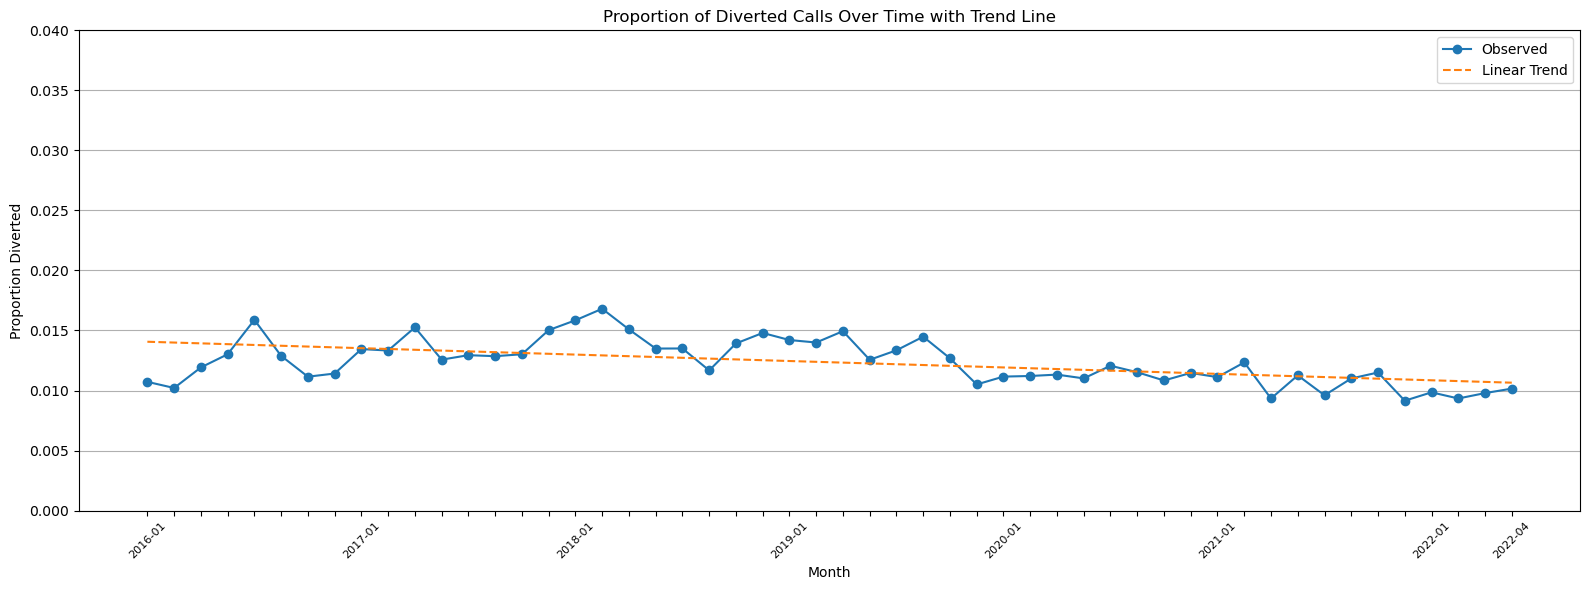

In [29]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert month to numeric (e.g., 0, 1, 2, ...)
monthly = monthly.copy()
monthly['month_num'] = np.arange(len(monthly))

# Fit model
X = monthly[['month_num']]
y = monthly['Proportion_Diverted']
model = LinearRegression().fit(X, y)

# Add predicted trendline to plot
monthly['trend'] = model.predict(X)
plt.figure(figsize=(16, 6))
plt.plot(monthly['month'].astype(str), monthly['Proportion_Diverted'], label='Observed', marker='o')
plt.plot(monthly['month'].astype(str), monthly['trend'], label='Linear Trend', linestyle='--')
plt.xticks(tick_locs, tick_labels, rotation=45, fontsize=8)
plt.title("Proportion of Diverted Calls Over Time with Trend Line")
plt.xlabel("Month")
plt.ylabel("Proportion Diverted")
plt.ylim(0, 0.04)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
cahoots_units = {"1J77", "3J79", "3J78", "4J79", "3J81", "3J76", "2J28", "2J29", "CAHOOT", "CAHOT", "CAHO"}

# Clean and upper-case if not already
call_data_td['PrimaryUnitCallSign'] = call_data_td['PrimaryUnitCallSign'].str.strip().str.upper()
call_data_td['RespondingUnitCallSign'] = call_data_td['RespondingUnitCallSign'].str.strip().str.upper()

# Identify CAHOOTS units
call_data_td['PrimaryIsCAH'] = call_data_td['PrimaryUnitCallSign'].isin(cahoots_units)
call_data_td['RespondingIsCAH'] = call_data_td['RespondingUnitCallSign'].isin(cahoots_units)

# Flag for direct CAHOOTS dispatch
call_data_td['Is_CAHOOTS_Direct'] = (call_data_td['RespondingIsCAH'] &
    (call_data_td['PrimaryIsCAH'] | call_data_td['PrimaryUnitCallSign'].isna())
)
call_data_td['Is_CAHOOTS_Direct'].value_counts()

Is_CAHOOTS_Direct
False    645369
True      52660
Name: count, dtype: int64

In [33]:
monthly_summary = call_data_td.groupby('month').agg({
    'Is_Diverted': 'sum',
    'Is_CAHOOTS_Direct': 'sum',
    'IncidentNumber': 'count'
}).rename(columns={
    'Is_Diverted': 'Diverted',
    'Is_CAHOOTS_Direct': 'Direct_CAHOOTS',
    'IncidentNumber': 'Total_Calls'
})

monthly_summary['Other_Calls'] = monthly_summary['Total_Calls'] - (
    monthly_summary['Diverted'] + monthly_summary['Direct_CAHOOTS']
)